# Baxter kinematics

In this notebook, we'll try IKPy on the baxter robot
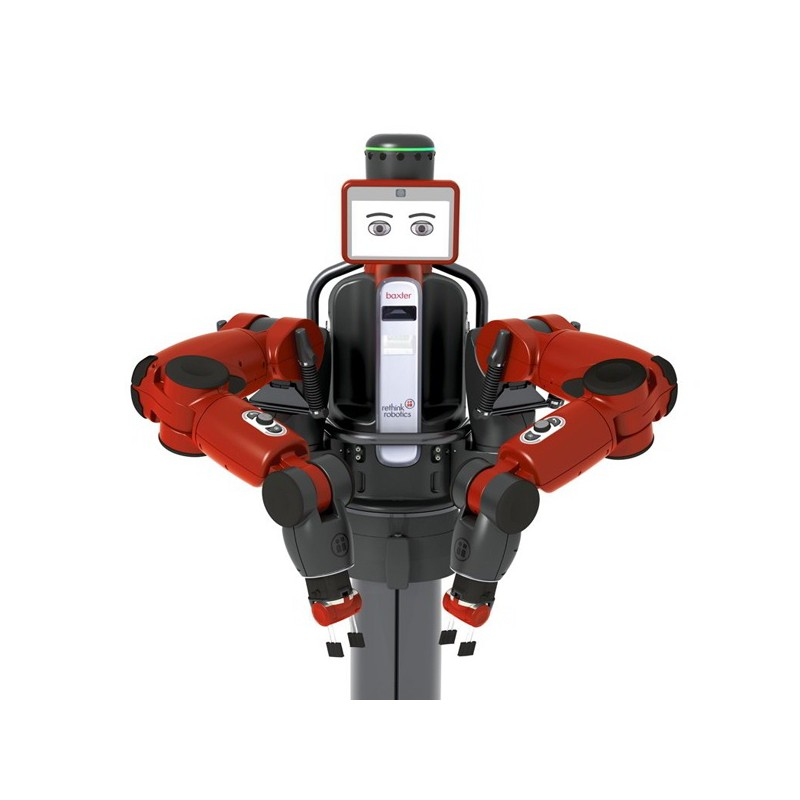

You will get the following chains:

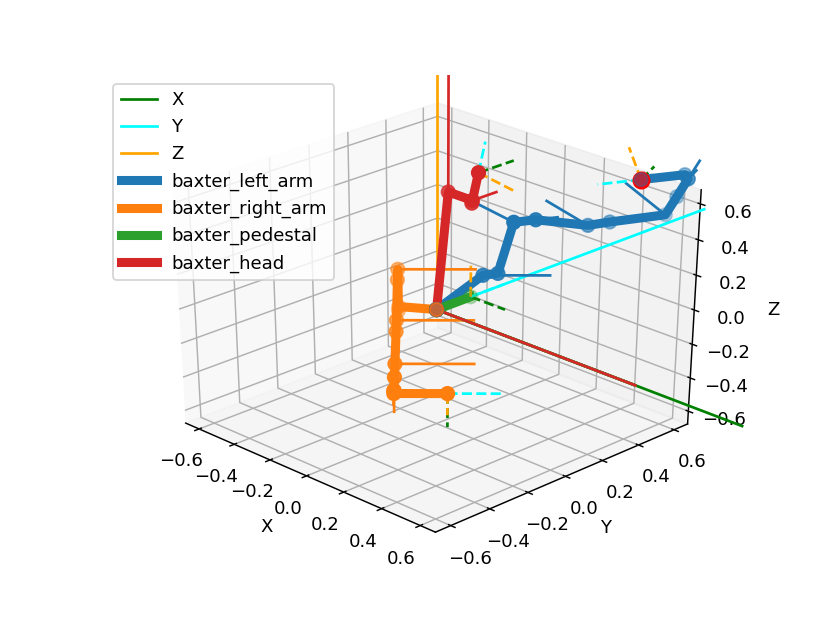

Let's begin!

## Requirements

To get this notebook to work, you need to install IKPy, version >= 3.0

Also, if you want to use interactive 3D visualisation (highly recommended), you must use the `widget` matplotlib backend

In [1]:
# Some necessary imports
import numpy as np

from ikpy.chain import Chain
from ikpy.utils import plot

# Optional: support for 3D plotting in the NB
%matplotlib widget
# turn this off, if you don't need it

 ## Robot import and setup

In [2]:
# First, let's import the baxter chains
baxter_left_arm_chain = Chain.from_json_file("../resources/baxter/baxter_left_arm.json")
baxter_right_arm_chain = Chain.from_json_file("../resources/baxter/baxter_right_arm.json")
baxter_pedestal_chain = Chain.from_json_file("../resources/baxter/baxter_pedestal.json")
baxter_head_chain = Chain.from_json_file("../resources/baxter/baxter_head.json")

/home/wslyen/.pyenv/versions/3.9.18/envs/webots_env/lib/python3.9/site-packages/ikpy/urdf/URDF.py:261: UserWarning: Joint left_hand is of type: fixed, but has an 'axis' attribute defined. This is not in the URDF spec and thus this axis is ignored
  warnings.warn("Joint {} is of type: fixed, but has an 'axis' attribute defined. This is not in the URDF spec and thus this axis is ignored".format(joint.attrib["name"]))
/home/wslyen/.pyenv/versions/3.9.18/envs/webots_env/lib/python3.9/site-packages/ikpy/urdf/URDF.py:261: UserWarning: Joint right_hand is of type: fixed, but has an 'axis' attribute defined. This is not in the URDF spec and thus this axis is ignored
  warnings.warn("Joint {} is of type: fixed, but has an 'axis' attribute defined. This is not in the URDF spec and thus this axis is ignored".format(joint.attrib["name"]))


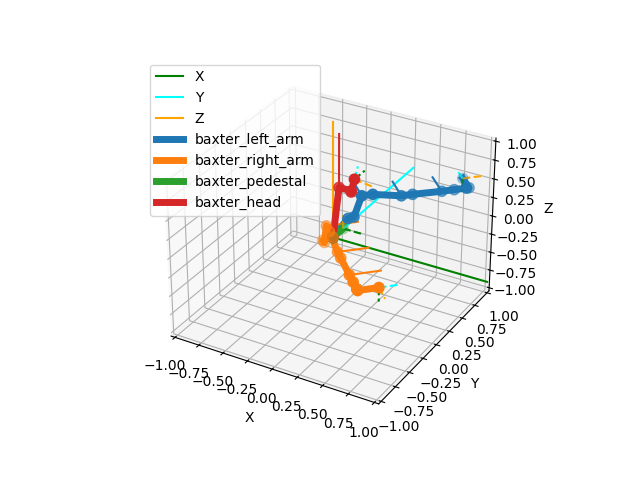

In [3]:
from mpl_toolkits.mplot3d import Axes3D;
fig, ax = plot.init_3d_figure();
baxter_left_arm_chain.plot([0] * (len(baxter_left_arm_chain)), ax)
baxter_right_arm_chain.plot([0] * (len(baxter_right_arm_chain)), ax)
baxter_pedestal_chain.plot([0] * (2 + 2), ax)
baxter_head_chain.plot([0] * (4 + 2), ax)
ax.legend()

## Inverse kinematics

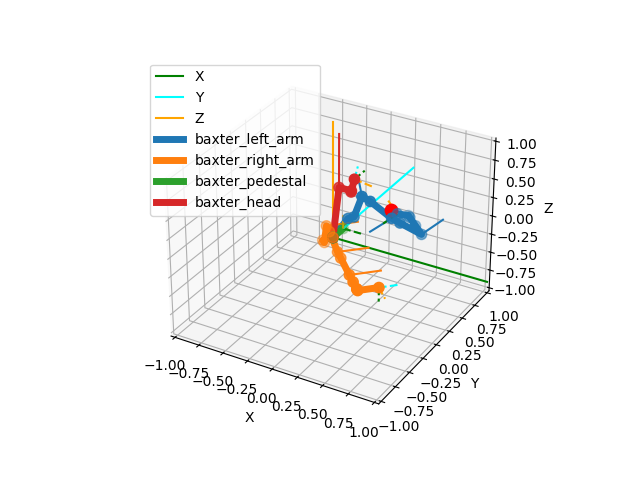

In [4]:
### Let's try some IK
fig, ax = plot.init_3d_figure();


target = [0.3, 0.5, 0.15]
target_orientation = [1, 0, 0]

frame_target = np.eye(4)
frame_target[:3, 3] = target

ik = baxter_left_arm_chain.inverse_kinematics_frame(frame_target)

baxter_left_arm_chain.plot(ik, ax, target=target)

baxter_right_arm_chain.plot([0] * (len(baxter_left_arm_chain)), ax)
baxter_pedestal_chain.plot([0] * (2 + 2), ax)
baxter_head_chain.plot([0] * (4 + 2), ax)
ax.legend()